#Code created in collaboration with Ludvig Marcussen and Philip Kofoed

In [1]:
import pandas as pd
import cloudscraper
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import httpx
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from scipy.stats import norm


In [2]:
# Functions


def get_headers(soup):  # Function that gets relevant headers
    headers = []
    results = soup.find(class_='thead2')
    ranks = results.find_all('th')
    for rank in ranks:
        text = rank.get_text()
        headers.append(text)
    headers.remove('AdjEM')
    return headers


def get_data(soup):  # Function that gets the relevant data
    results = soup.find("tbody")
    list_of_list = []
    classes_body = ['hard_left', 'next_left', 'conf', 'wl', 'td-left']
    for cl in classes_body:
        list_ranks = []
        ranks = results.find_all("td", class_=cl)
        if cl == 'td-left':
            for rank in ranks:
                text = rank.get_text()
                list_ranks.append(text)
            for i in range(8):
                list_list = [float(i) for i in list_ranks[i::8]]
                list_of_list.append(list_list)
        else:
            for rank in ranks:
                text = rank.get_text()
                list_ranks.append(text)
            list_of_list.append(list_ranks)
    return list_of_list


def create_df(headers, data):  # Combine headers
    dictionary = dict(zip(headers, data))
    df = pd.DataFrame(dictionary)
    df['Team'] = df['Team'].str.replace('\d+', '')
    df['Team'] = df['Team'].str.strip()
    return df


def plot_hist(df, header, title, figsize=(8, 6), bin_width=10, xlabel=None, ylabel=None, mask=False, mask_name=False):
    if mask:
        data = df[header].iloc[mask].to_numpy(dtype=np.float64)
        num_bin = int(np.ceil((np.max(data)-np.min(data))/bin_width))

        fig, ax = plt.subplots(figsize=figsize)
        bins = np.histogram_bin_edges(
            df[header].iloc[mask].to_numpy(dtype=np.float64), bins=num_bin)

        sns.histplot(x=header, data=df.iloc[mask], hue=mask_name,
                     hue_order=relevant_conferences, multiple="dodge", ax=ax, bins=bins)

    else:
        data = df[header].to_numpy(dtype=np.float64)
        num_bin = int(np.ceil((np.max(data)-np.min(data))/bin_width))

        fig, ax = plt.subplots(figsize=figsize)
        bins = np.histogram_bin_edges(
            df[header].to_numpy(dtype=np.float64), bins=num_bin)

        sns.histplot(x=header, data=df, hue=mask_name,
                     multiple="dodge", ax=ax, bins=bins)

    ticks = [np.min(data)+(i*bin_width/2) for i in np.arange(1, num_bin*2, 2)]
    ax.set_xticks(bins)
    ax.tick_params('x', top=True, labeltop=True,
                   bottom=False, labelbottom=False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

    tick_names = [
        f'{int(ticks[i]-(bin_width/2))}-{int(ticks[i]+(bin_width/2))}' for i in range(len(ticks))]
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for tick_name, x in zip(tick_names, bin_centers):
        ax.annotate(tick_name, xy=(x, 0.04), xycoords=('data', 'axes fraction'),
                    xytext=(0, -18), textcoords='offset points', va='top', ha='center', fontsize=15)

    ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    sns.move_legend(ax, loc=(0.01, 0.65))
    ax.margins(x=0)
    ax.xaxis.labelpad = 20
    ax.grid(axis='x', linewidth=5, linestyle='-', alpha=1)
    fig.show()


def scrape_html(url, scraper_type='html.parser'):
    scraper = cloudscraper.create_scraper()
    response = scraper.get(url)
    soup = BeautifulSoup(response.content, scraper_type)
    return soup


def sort_as_dict(df, header):
    dictionary = {}
    for i, key in enumerate(df[header]):
        if not key in dictionary:
            dictionary[key] = []
        if key in dictionary:
            dictionary[key].append(i)
    return dictionary



In [3]:
url_2014 = 'https://kenpom.com/index.php?y=2014'
url_2009 = 'https://kenpom.com/index.php?y=2009'

soup_2014 = scrape_html(url_2014)
soup_2009 = scrape_html(url_2009)

df_2014 = create_df(get_headers(soup_2014), get_data(soup_2014))
df_2009 = create_df(get_headers(soup_2009), get_data(soup_2009))
#df_2014.to_csv(r'C:\Users\caspe\OneDrive\Desktop\AMAS2023\AMAS_casper\Assignment 1\kenpom_2014', index=False)
#df_2009.to_csv(r'C:\Users\caspe\OneDrive\Desktop\AMAS2023\AMAS_casper\Assignment 1\kenpom_2009', index=False)


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1726415857.py:40: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Team'] = df['Team'].str.replace('\d+', '')


AttributeError: 'NoneType' object has no attribute 'find_all'

In [4]:
df_2014 = pd.read_csv(r'.\kenpom_2014')
df_2009 = pd.read_csv(r'.\kenpom_2009')


In [5]:
conference_2014 = sort_as_dict(df_2014, 'Conf')
conference_2009 = sort_as_dict(df_2009, 'Conf')
relevant_conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
bool_mask_2014 = [conf in np.array(relevant_conferences)
                  for conf in df_2014["Conf"]]
bool_mask_2009 = [conf in np.array(relevant_conferences)
                  for conf in df_2009["Conf"]]


In [6]:
plt.style.use(r'..\casper_style.mplstyle')


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1726415857.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


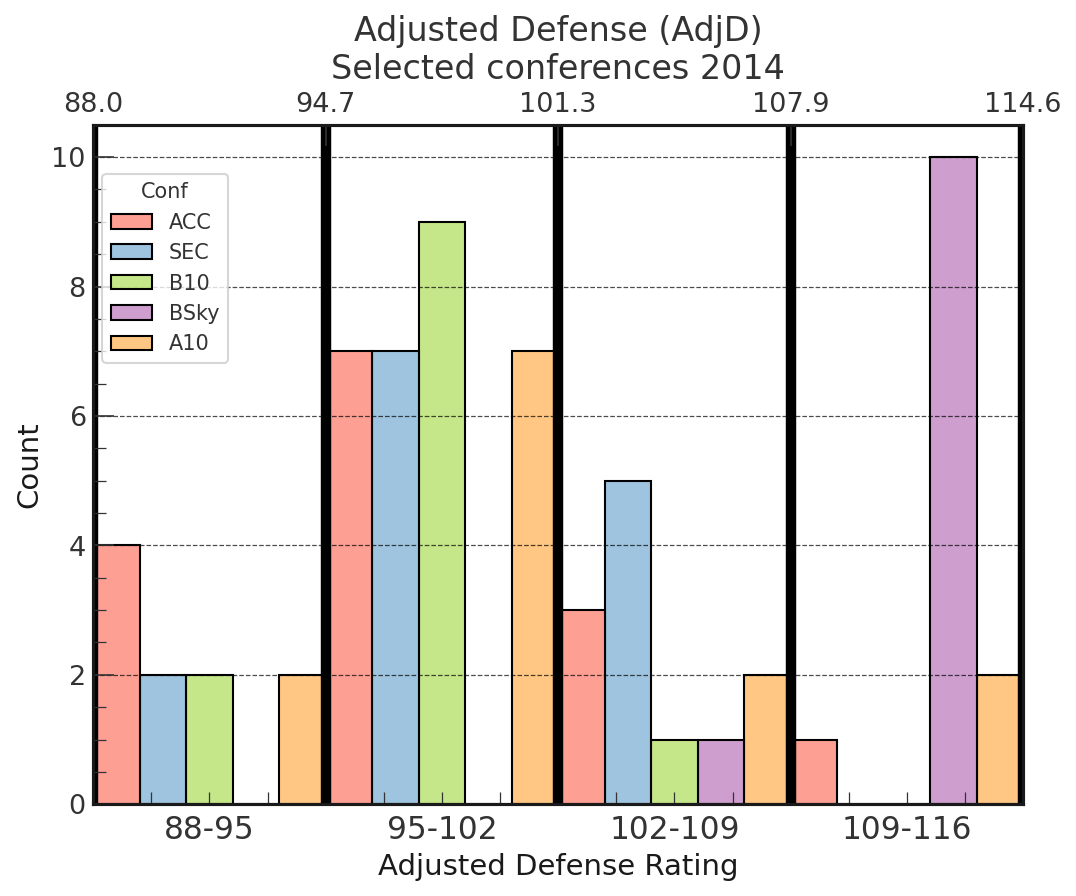

In [7]:
plot_hist(df=df_2014, header='AdjD', title='Adjusted Defense (AdjD)\nSelected conferences 2014',
          mask=bool_mask_2014, bin_width=7, mask_name='Conf', xlabel='Adjusted Defense Rating')


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1726415857.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


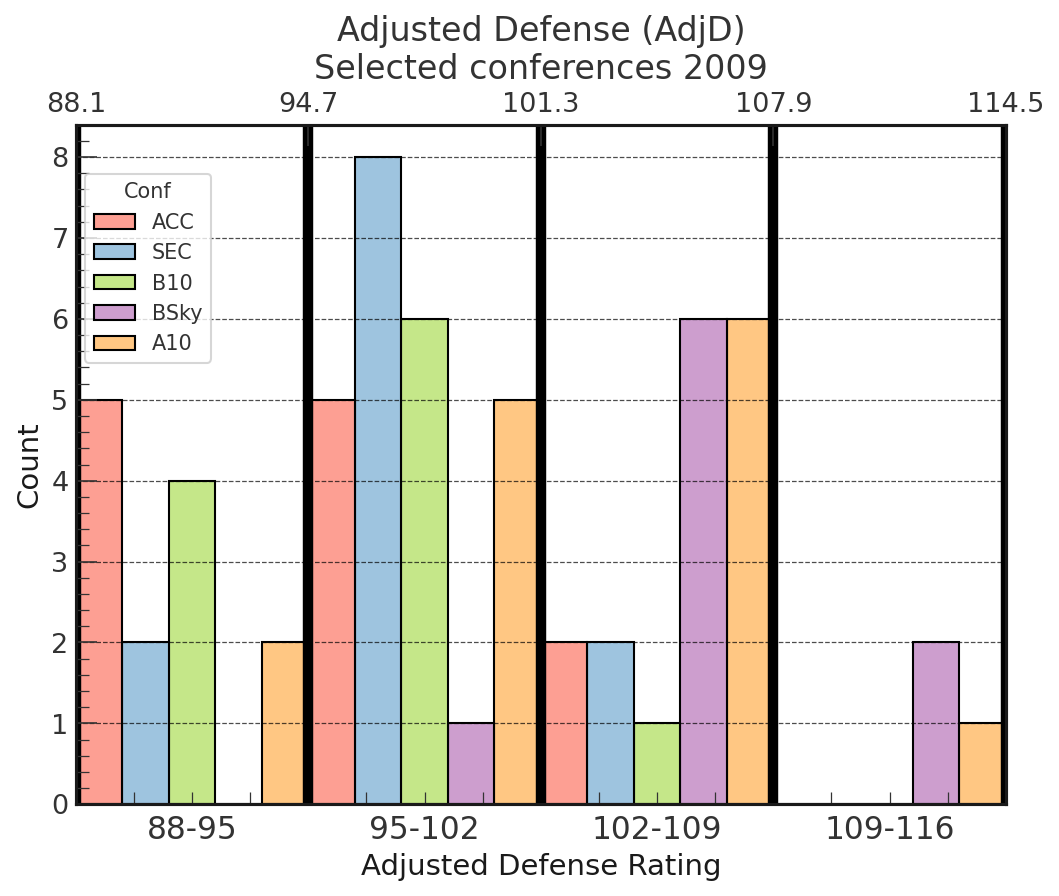

In [8]:
plot_hist(df_2009, 'AdjD', 'Adjusted Defense (AdjD)\nSelected conferences 2009',
          mask=bool_mask_2009, bin_width=7, mask_name='Conf', xlabel='Adjusted Defense Rating')

Text(0.5, 1.0, 'Adjusted Defense (AdjD)\nSelected conferences 2014')

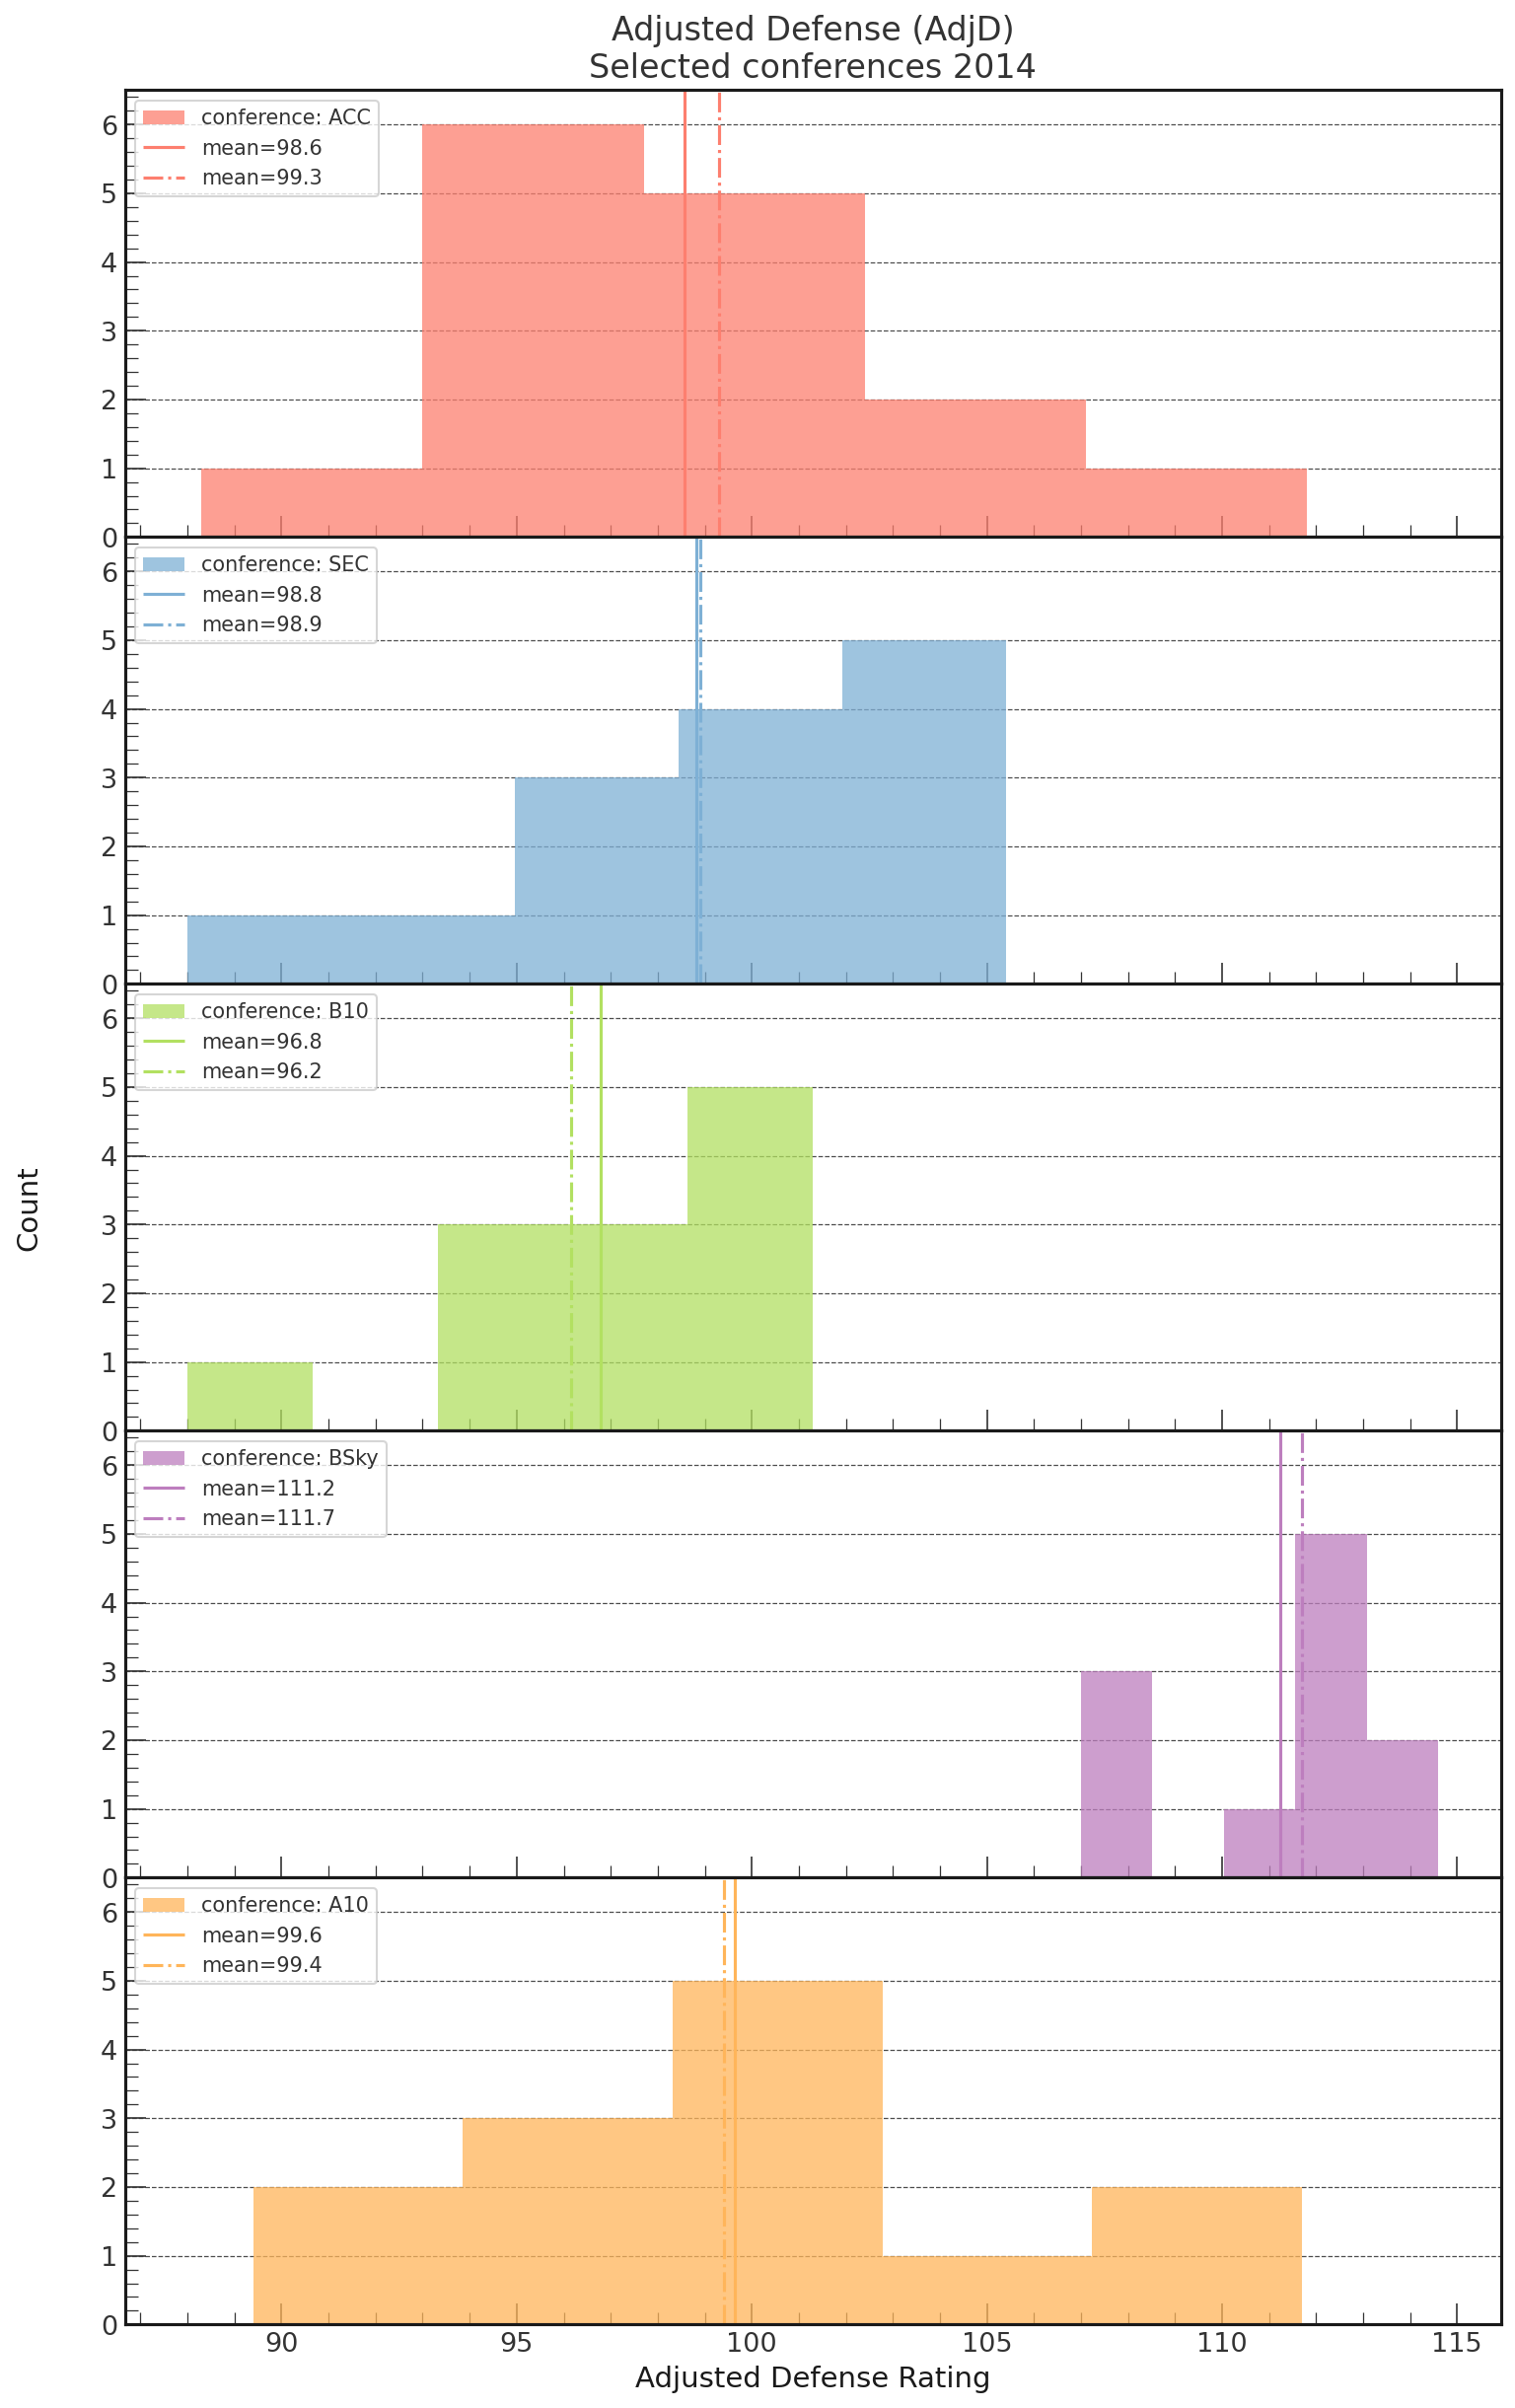

In [9]:
dict_conf_2014 = sort_as_dict(df_2014, 'Conf')
dict_conf_2009 = sort_as_dict(df_2009, 'Conf')

selected_conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10']
prop_cycle = plt.rcParams['axes.prop_cycle']

xlabel = '$X$'
ylabel = '$Y$'


Nlayer = 5

fig, axarr = plt.subplots(Nlayer, figsize=(
    12, 20), sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0})

for i, (ax, key) in enumerate(zip(axarr, selected_conferences)):
    histos = df_2014['AdjD'][dict_conf_2014[key]]
    ax.hist(histos, bins=5, linewidth=4.0, color=prop_cycle.by_key()[
            'color'][i], label=f'conference: {selected_conferences[i]}', alpha=0.75)
    ax.set_ylim(ymin=0, ymax=6.5)
    ax.vlines(x=np.mean(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-', label=f'mean={np.mean(histos):.1f}')
    ax.vlines(x=np.median(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-.', label=f'mean={np.median(histos):.1f}')
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)
    ax.legend(loc='upper left', prop={'size': 10})

ax.set(xlabel='Adjusted Defense Rating', ylabel='Count')
ax.yaxis.set_label_coords(-0.06, Nlayer/2)
axarr[0].set_title('Adjusted Defense (AdjD)\nSelected conferences 2014')

Text(0.5, 1.0, 'Adjusted Defense (AdjD)\nSelected conferences 2009')

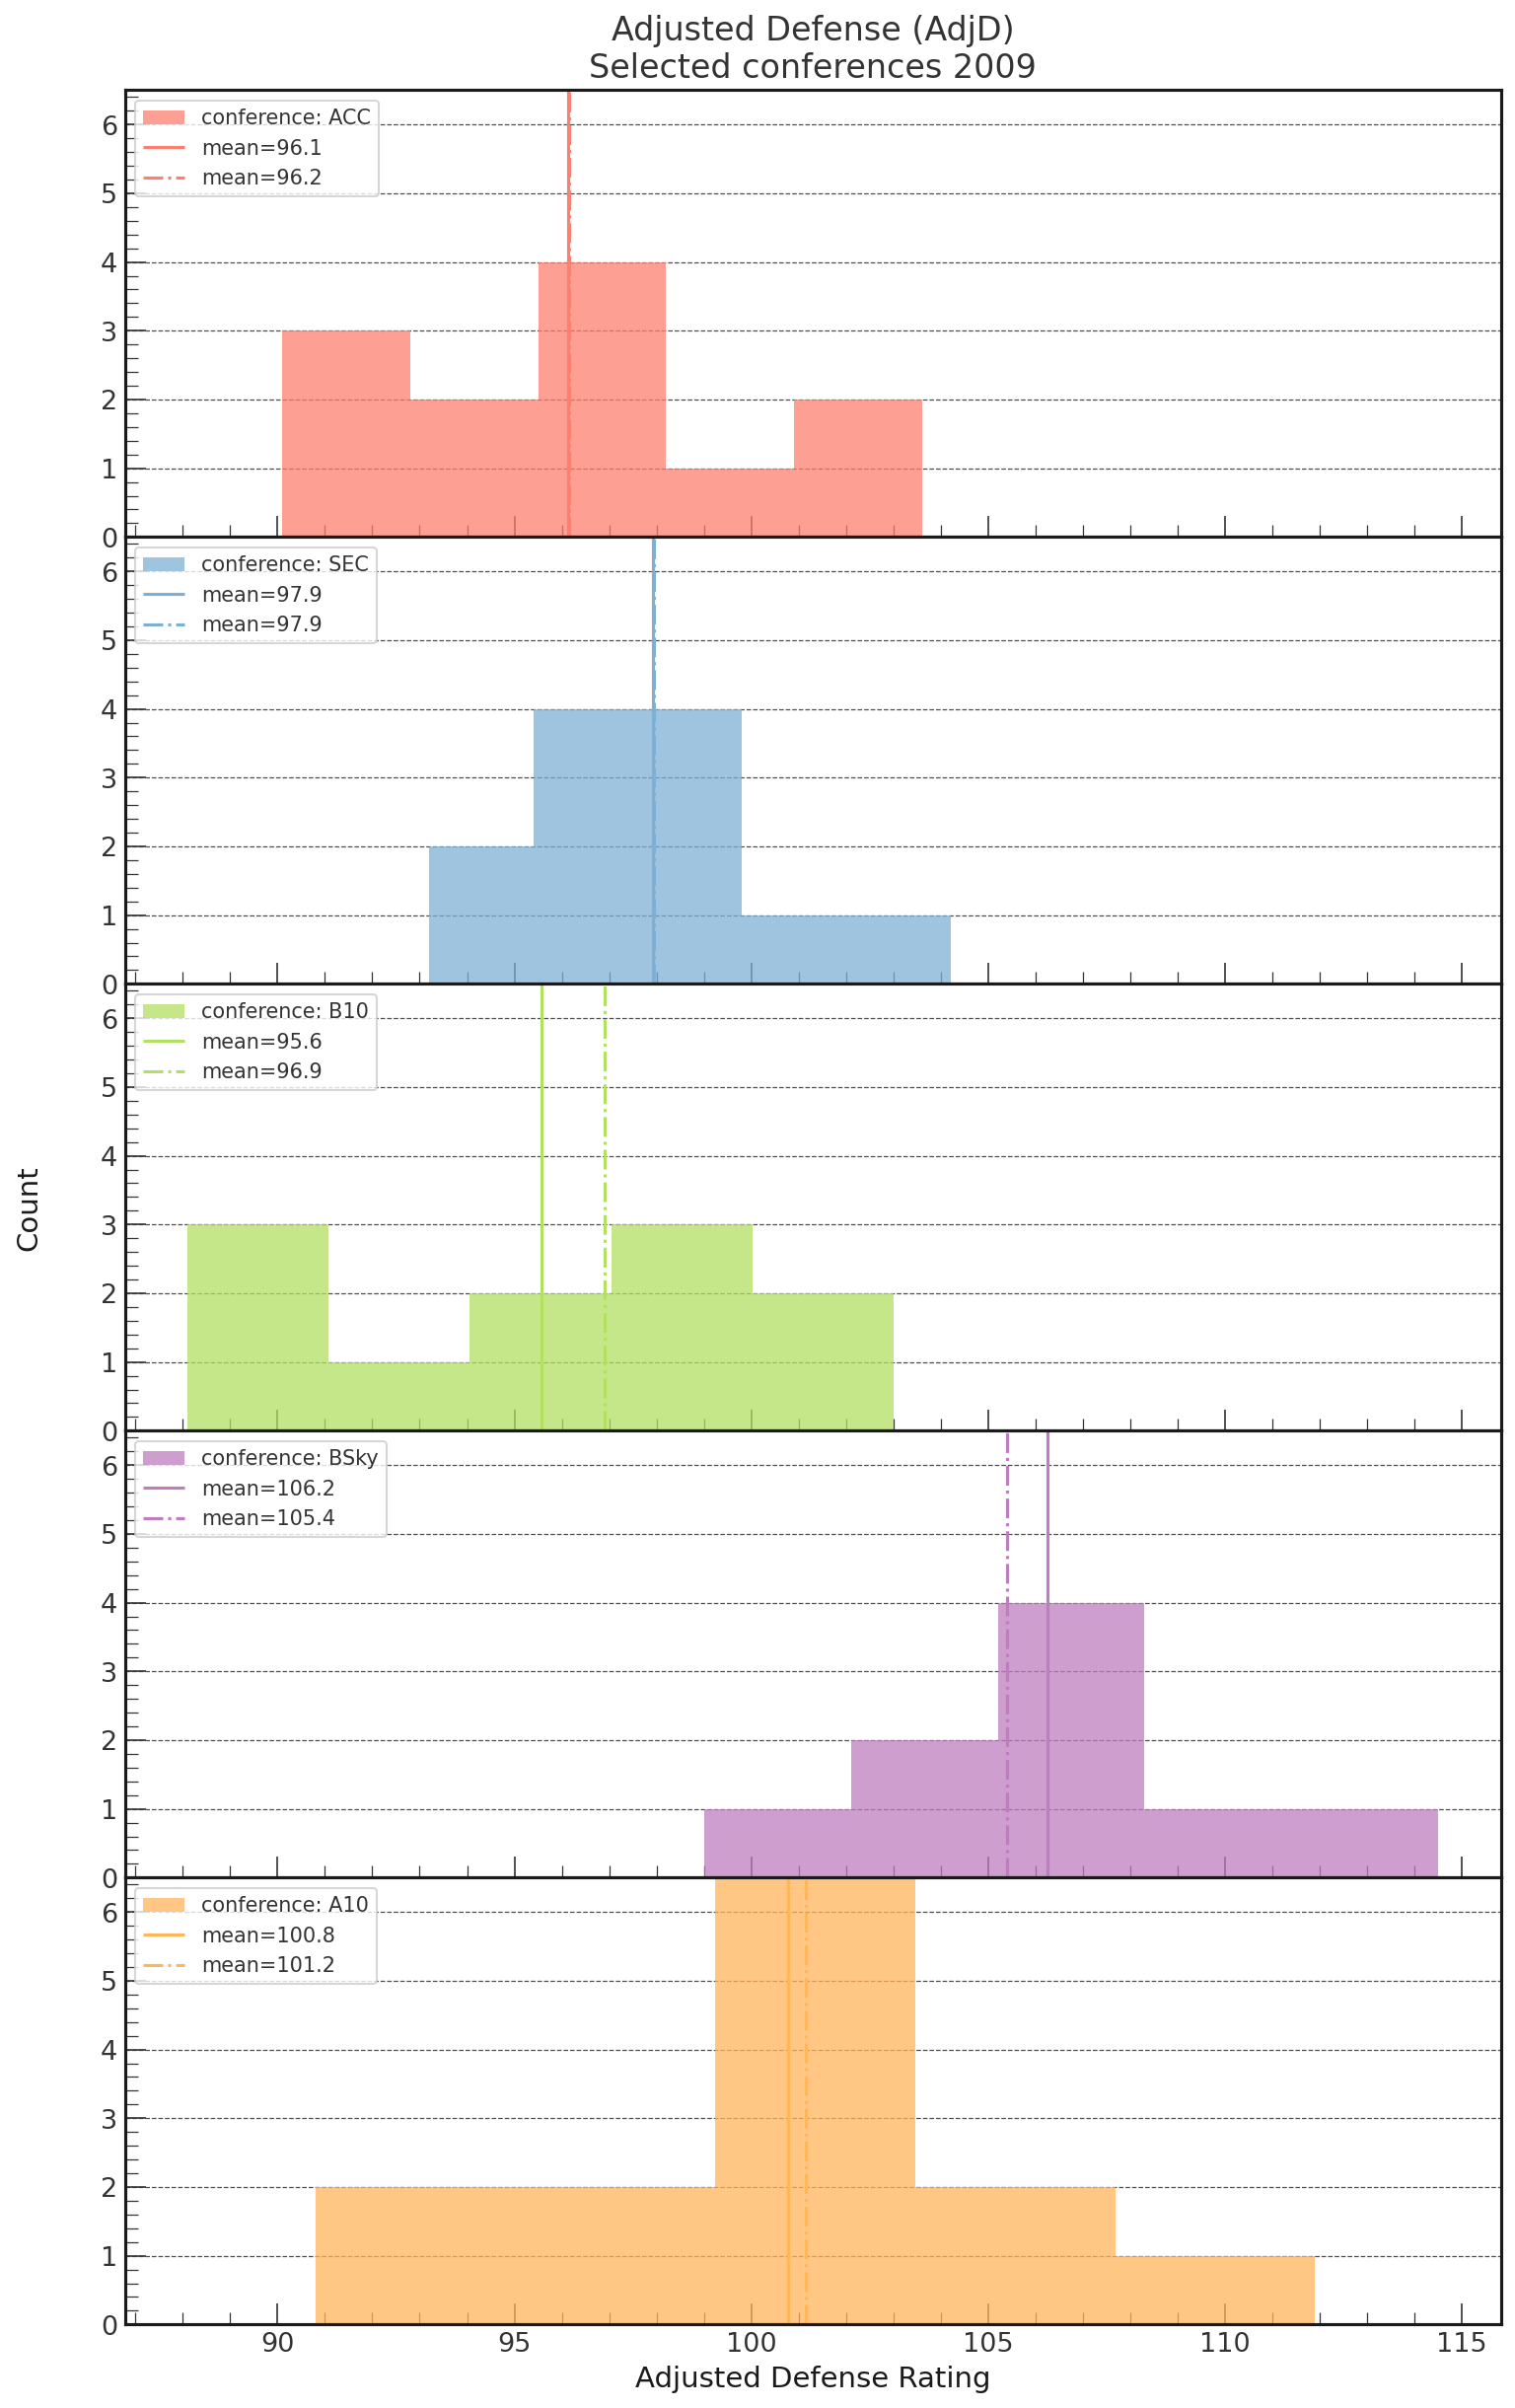

In [10]:
fig, axarr = plt.subplots(Nlayer, figsize=(
    12, 20), sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0})

for i, (ax, key) in enumerate(zip(axarr, selected_conferences)):
    histos = df_2009['AdjD'][dict_conf_2009[key]]
    ax.hist(histos, bins=5, linewidth=4.0, color=prop_cycle.by_key()[
            'color'][i], label=f'conference: {selected_conferences[i]}', alpha=0.75)
    ax.set_ylim(ymin=0, ymax=6.5)
    ax.vlines(x=np.mean(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-', label=f'mean={np.mean(histos):.1f}')
    ax.vlines(x=np.median(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-.', label=f'mean={np.median(histos):.1f}')
    ax.set_axisbelow(True)
    ax.xaxis.grid(False)
    ax.legend(loc='upper left', prop={'size': 10})

ax.set(xlabel='Adjusted Defense Rating', ylabel='Count')
ax.yaxis.set_label_coords(-0.06, Nlayer/2)
axarr[0].set_title('Adjusted Defense (AdjD)\nSelected conferences 2009')

In [11]:
dfmerge = df_2014.merge(df_2009, left_on=['Team', 'Conf'], right_on=[
                        'Team', 'Conf'], suffixes=('_2014', '_2009')).reset_index(drop=True)
dfmerge['AdjO_diff'] = dfmerge['AdjO_2014']-dfmerge['AdjO_2009']
bool_mask_merge = np.array(
    [conf in np.array(relevant_conferences) for conf in dfmerge["Conf"]])
df_merged_selected_conf = dfmerge.iloc[bool_mask_merge, :]
df_merged_rest = dfmerge.iloc[~bool_mask_merge, :]
conference_merged_selected_conf = sort_as_dict(df_merged_selected_conf, 'Conf')

AdjO_diff = np.abs(
    dfmerge['AdjO_diff'].iloc[bool_mask_merge].to_numpy(dtype=np.float64))

# plt.scatter(dfmerge['AdjO_2009'].iloc[bool_mask_merge],dfmerge['AdjO_2009'].iloc[bool_mask_merge]-dfmerge['AdjO_2014'].iloc[bool_mask_merge])

In [12]:
mean_rest = np.mean(df_merged_rest['AdjO_diff'])
median_rest = np.median(df_merged_rest['AdjO_diff'])

In [13]:
conf_mean = {}
conf_median = {}

for i, key in enumerate(df_merged_selected_conf['Conf']):
    if not key in conf_mean:
        conf_mean[key] = []
        conf_median[key] = []

    if key in conf_mean:
        conf_mean[key].append(df_merged_selected_conf['AdjO_diff'].iloc[i])
        conf_median[key].append(df_merged_selected_conf['AdjO_diff'].iloc[i])

for k, v in conf_mean.items():
    conf_mean[k] = np.mean(v)
for k, v in conf_median.items():
    conf_median[k] = np.median(v)
conf_mean = dict(list((i, conf_mean.get(i)) for i in selected_conferences))
conf_median = dict(list((i, conf_median.get(i)) for i in selected_conferences))


In [14]:
df_mean_median = pd.DataFrame(
    (conf_mean, conf_median), index=['Mean', 'Median'])
df_mean_median['Remaining'] = [mean_rest, median_rest]
df_mean_median = df_mean_median.round(2)
df_mean_median.to_latex(
    r'C:\Users\caspe\OneDrive\Desktop\AMAS2023\AMAS_casper\Assignment 1\Plots\mean_median_table')

In [15]:
display(df_merged_selected_conf)

,Rk_2014,Team,Conf,W-L_2014,AdjO_2014,AdjD_2014,AdjT_2014,Luck_2014,AdjEM_2014,OppO_2014,...,Rk_2009,W-L_2009,AdjO_2009,AdjD_2009,AdjT_2009,Luck_2009,AdjEM_2009,OppO_2009,OppD_2009,AdjO_diff
0,3,Florida,SEC,36-3,116.5,88.0,61.3,0.053,2.39,109.4,...,35,25-11,115.1,98.9,65.8,-0.076,-8.15,104.0,101.4,1.4
1,4,Virginia,ACC,30-7,114.8,88.3,59.5,0.012,1.57,109.4,...,104,10-18,103.5,97.8,67.2,-0.066,-2.58,108.4,98.6,11.3
2,5,Wisconsin,B10,30-8,122.0,96.1,62.4,0.019,3.33,110.2,...,29,20-13,113.3,95.7,59.1,-0.052,1.32,107.3,97.8,8.7
5,8,Duke,ACC,26-9,124.7,100.4,64.6,-0.035,2.40,109.2,...,10,30-7,117.5,93.2,66.3,0.053,3.18,108.5,98.3,7.2
6,9,Michigan St.,B10,29-9,118.6,94.7,64.4,-0.003,0.57,110.2,...,9,31-7,114.3,89.9,66.5,0.091,5.81,109.4,97.1,4.3
7,10,Tennessee,SEC,24-13,117.9,94.2,61.6,-0.099,1.46,108.9,...,32,21-13,115.1,98.7,67.7,-0.032,9.15,107.9,98.5,2.8
9,12,Michigan,B10,28-9,123.9,100.5,61.0,0.047,0.62,110.3,...,47,21-14,112.2,97.5,62.5,0.014,0.63,108.5,97.1,11.7
10,13,Kentucky,SEC,29-11,118.3,95.8,64.0,-0.025,4.19,110.5,...,48,22-14,107.8,93.2,66.6,-0.073,-5.74,106.5,101.4,10.5
11,19,Ohio St.,B10,25-10,109.3,88.0,64.0,-0.043,-3.36,109.2,...,34,22-11,113.3,96.9,62.5,0.042,-3.41,107.7,98.2,-4.0
14,22,Iowa,B10,20-13,120.2,99.8,68.6,-0.116,-6.19,108.6,...,87,15-17,108.6,100.2,57.6,-0.055,-3.27,107.6,99.7,11.6


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/563861276.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


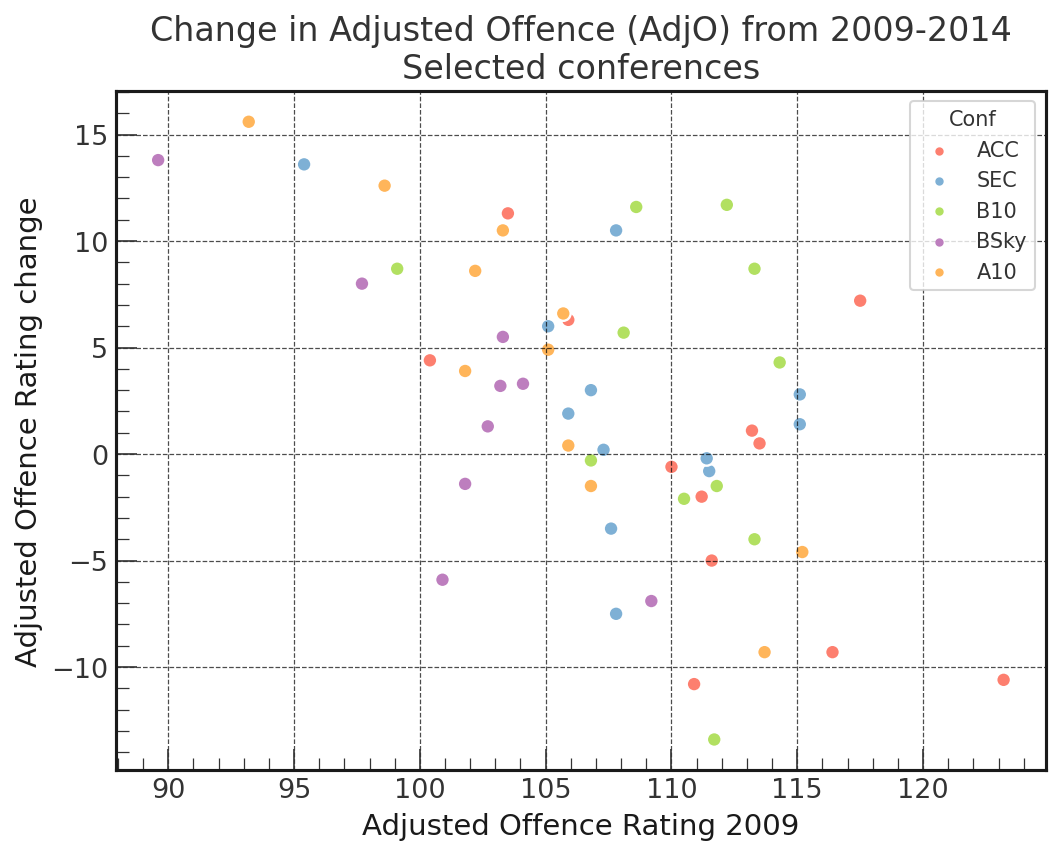

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_merged_selected_conf, x='AdjO_2009', y='AdjO_diff',
                hue='Conf', hue_order=relevant_conferences, ax=ax, s=200)
ax.set_title(
    'Change in Adjusted Offence (AdjO) from 2009-2014\nSelected conferences')
ax.set_xlabel('Adjusted Offence Rating 2009')
ax.set_ylabel('Adjusted Offence Rating change')
fig.show()

C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/793353140.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'r', lw=2, label='Gauss PDF', color='#7eb0d5')


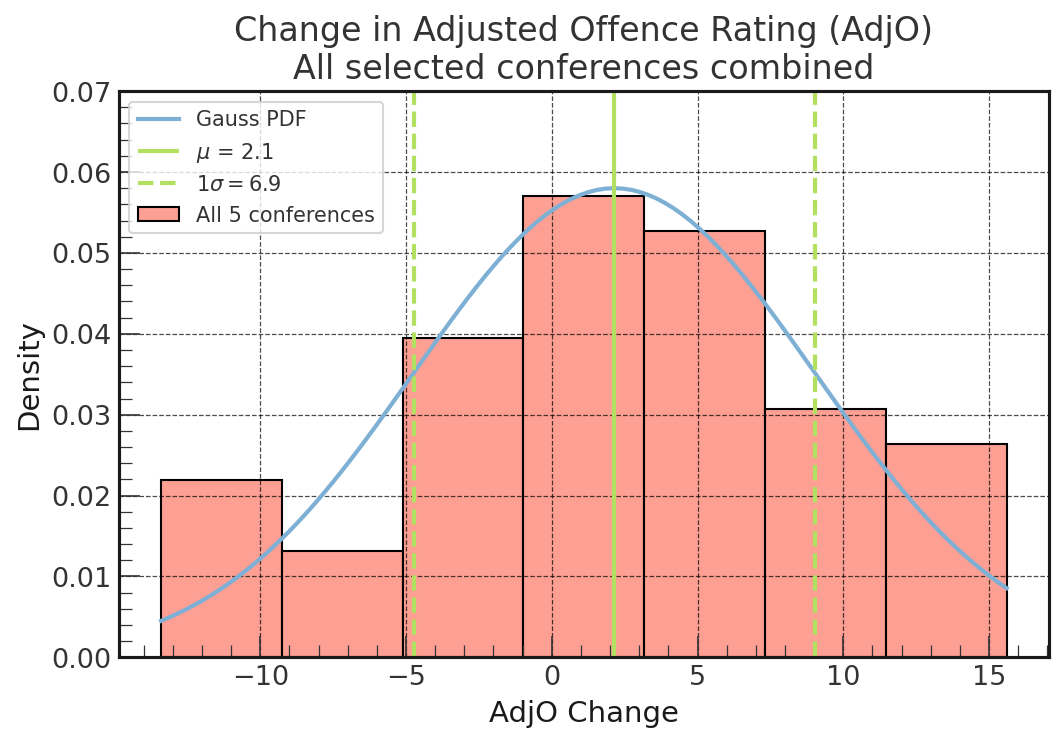

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
xmin, xmax = np.min(df_merged_selected_conf['AdjO_diff']), np.max(df_merged_selected_conf['AdjO_diff'])
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df_merged_selected_conf['AdjO_diff'])
p = norm.pdf(x, mu, std)
sns.histplot(data=df_merged_selected_conf, x='AdjO_diff', color='#fd7f6f', ax=ax, kde=False, stat='density', label='All 5 conferences')
ax.plot(x, p, 'r', lw=2, label='Gauss PDF', color='#7eb0d5')  
ax.set_xlabel('AdjO Change')  
ax.set_title('Change in Adjusted Offence Rating (AdjO)\nAll selected conferences combined')       
ax.vlines(mu, ymin=0, ymax=0.07, color='#b2e061',linewidth=2, label=f'$\mu$ = {mu:.1f}')
ax.vlines(mu+std, ymin=0, ymax=0.07, linestyle='--', label=f'$1\sigma = {std:.1f}$', color='#b2e061',linewidth=2)
ax.vlines(mu-std, ymin=0, ymax=0.07, linestyle='--', color='#b2e061',linewidth=2)

ax.set_ymargin(0)                                        
ax.legend(loc='upper left')

In [18]:
relevant_conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE']
bool_mask_2014 = [conf in np.array(relevant_conferences)
                  for conf in df_2014["Conf"]]
bool_mask_2009 = [conf in np.array(relevant_conferences)
                  for conf in df_2009["Conf"]]


In [19]:
plt.style.use(r'..\casper_style.mplstyle')


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1726415857.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


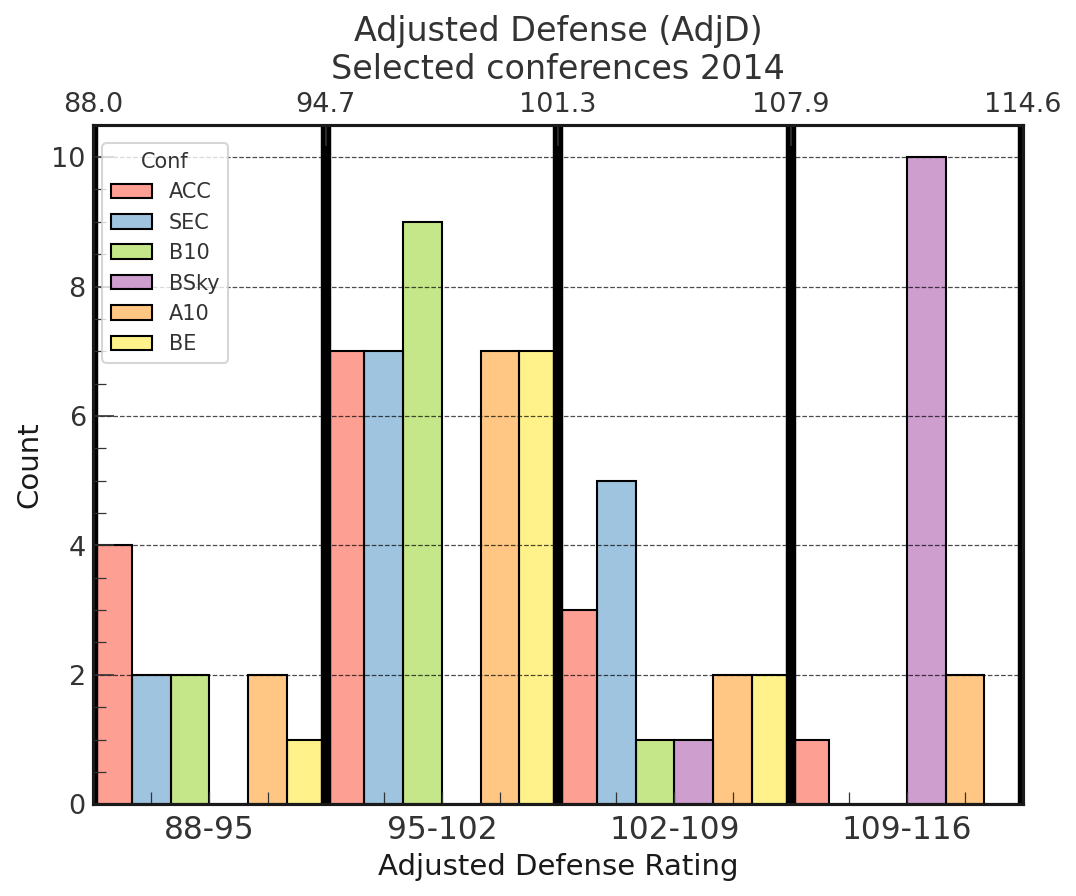

In [20]:
plot_hist(df=df_2014, header='AdjD', title='Adjusted Defense (AdjD)\nSelected conferences 2014',
          mask=bool_mask_2014, bin_width=7, mask_name='Conf', xlabel='Adjusted Defense Rating')


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1726415857.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


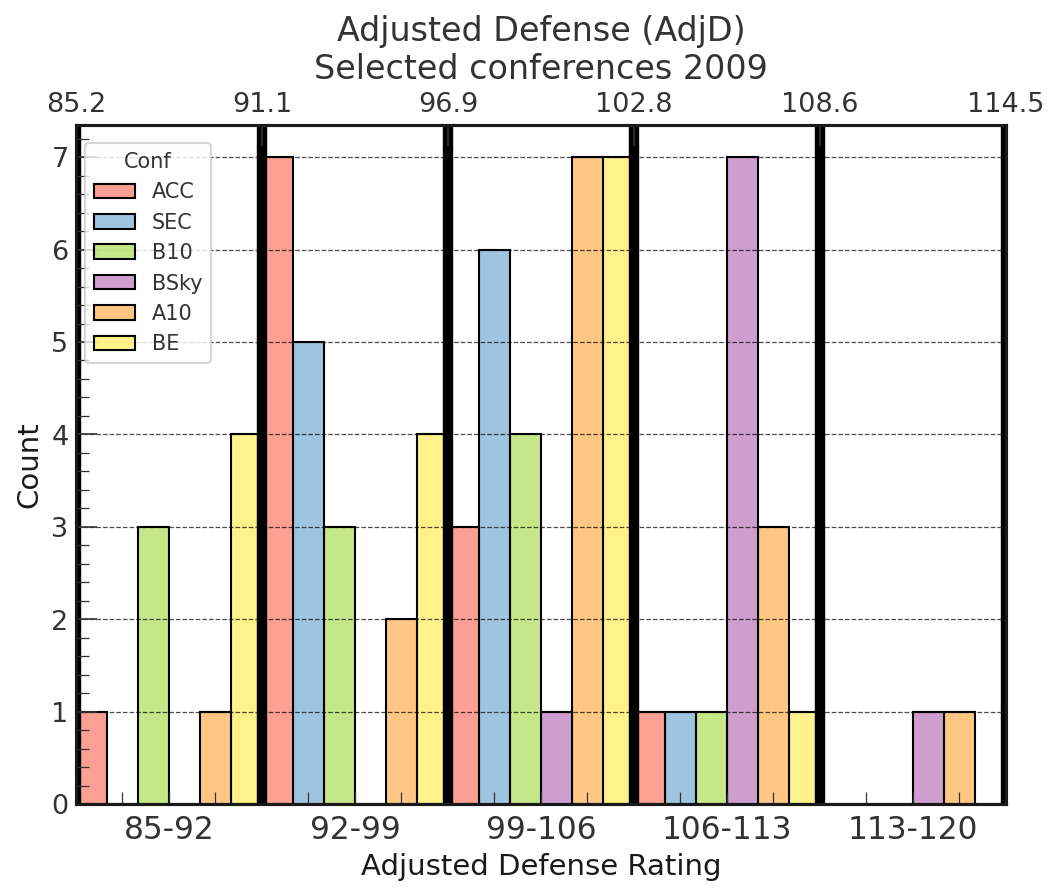

In [21]:
plot_hist(df_2009, 'AdjD', 'Adjusted Defense (AdjD)\nSelected conferences 2009',
          mask=bool_mask_2009, bin_width=7, mask_name='Conf', xlabel='Adjusted Defense Rating')

Text(0.5, 1.0, 'Adjusted Defense (AdjD)\nSelected conferences 2014')

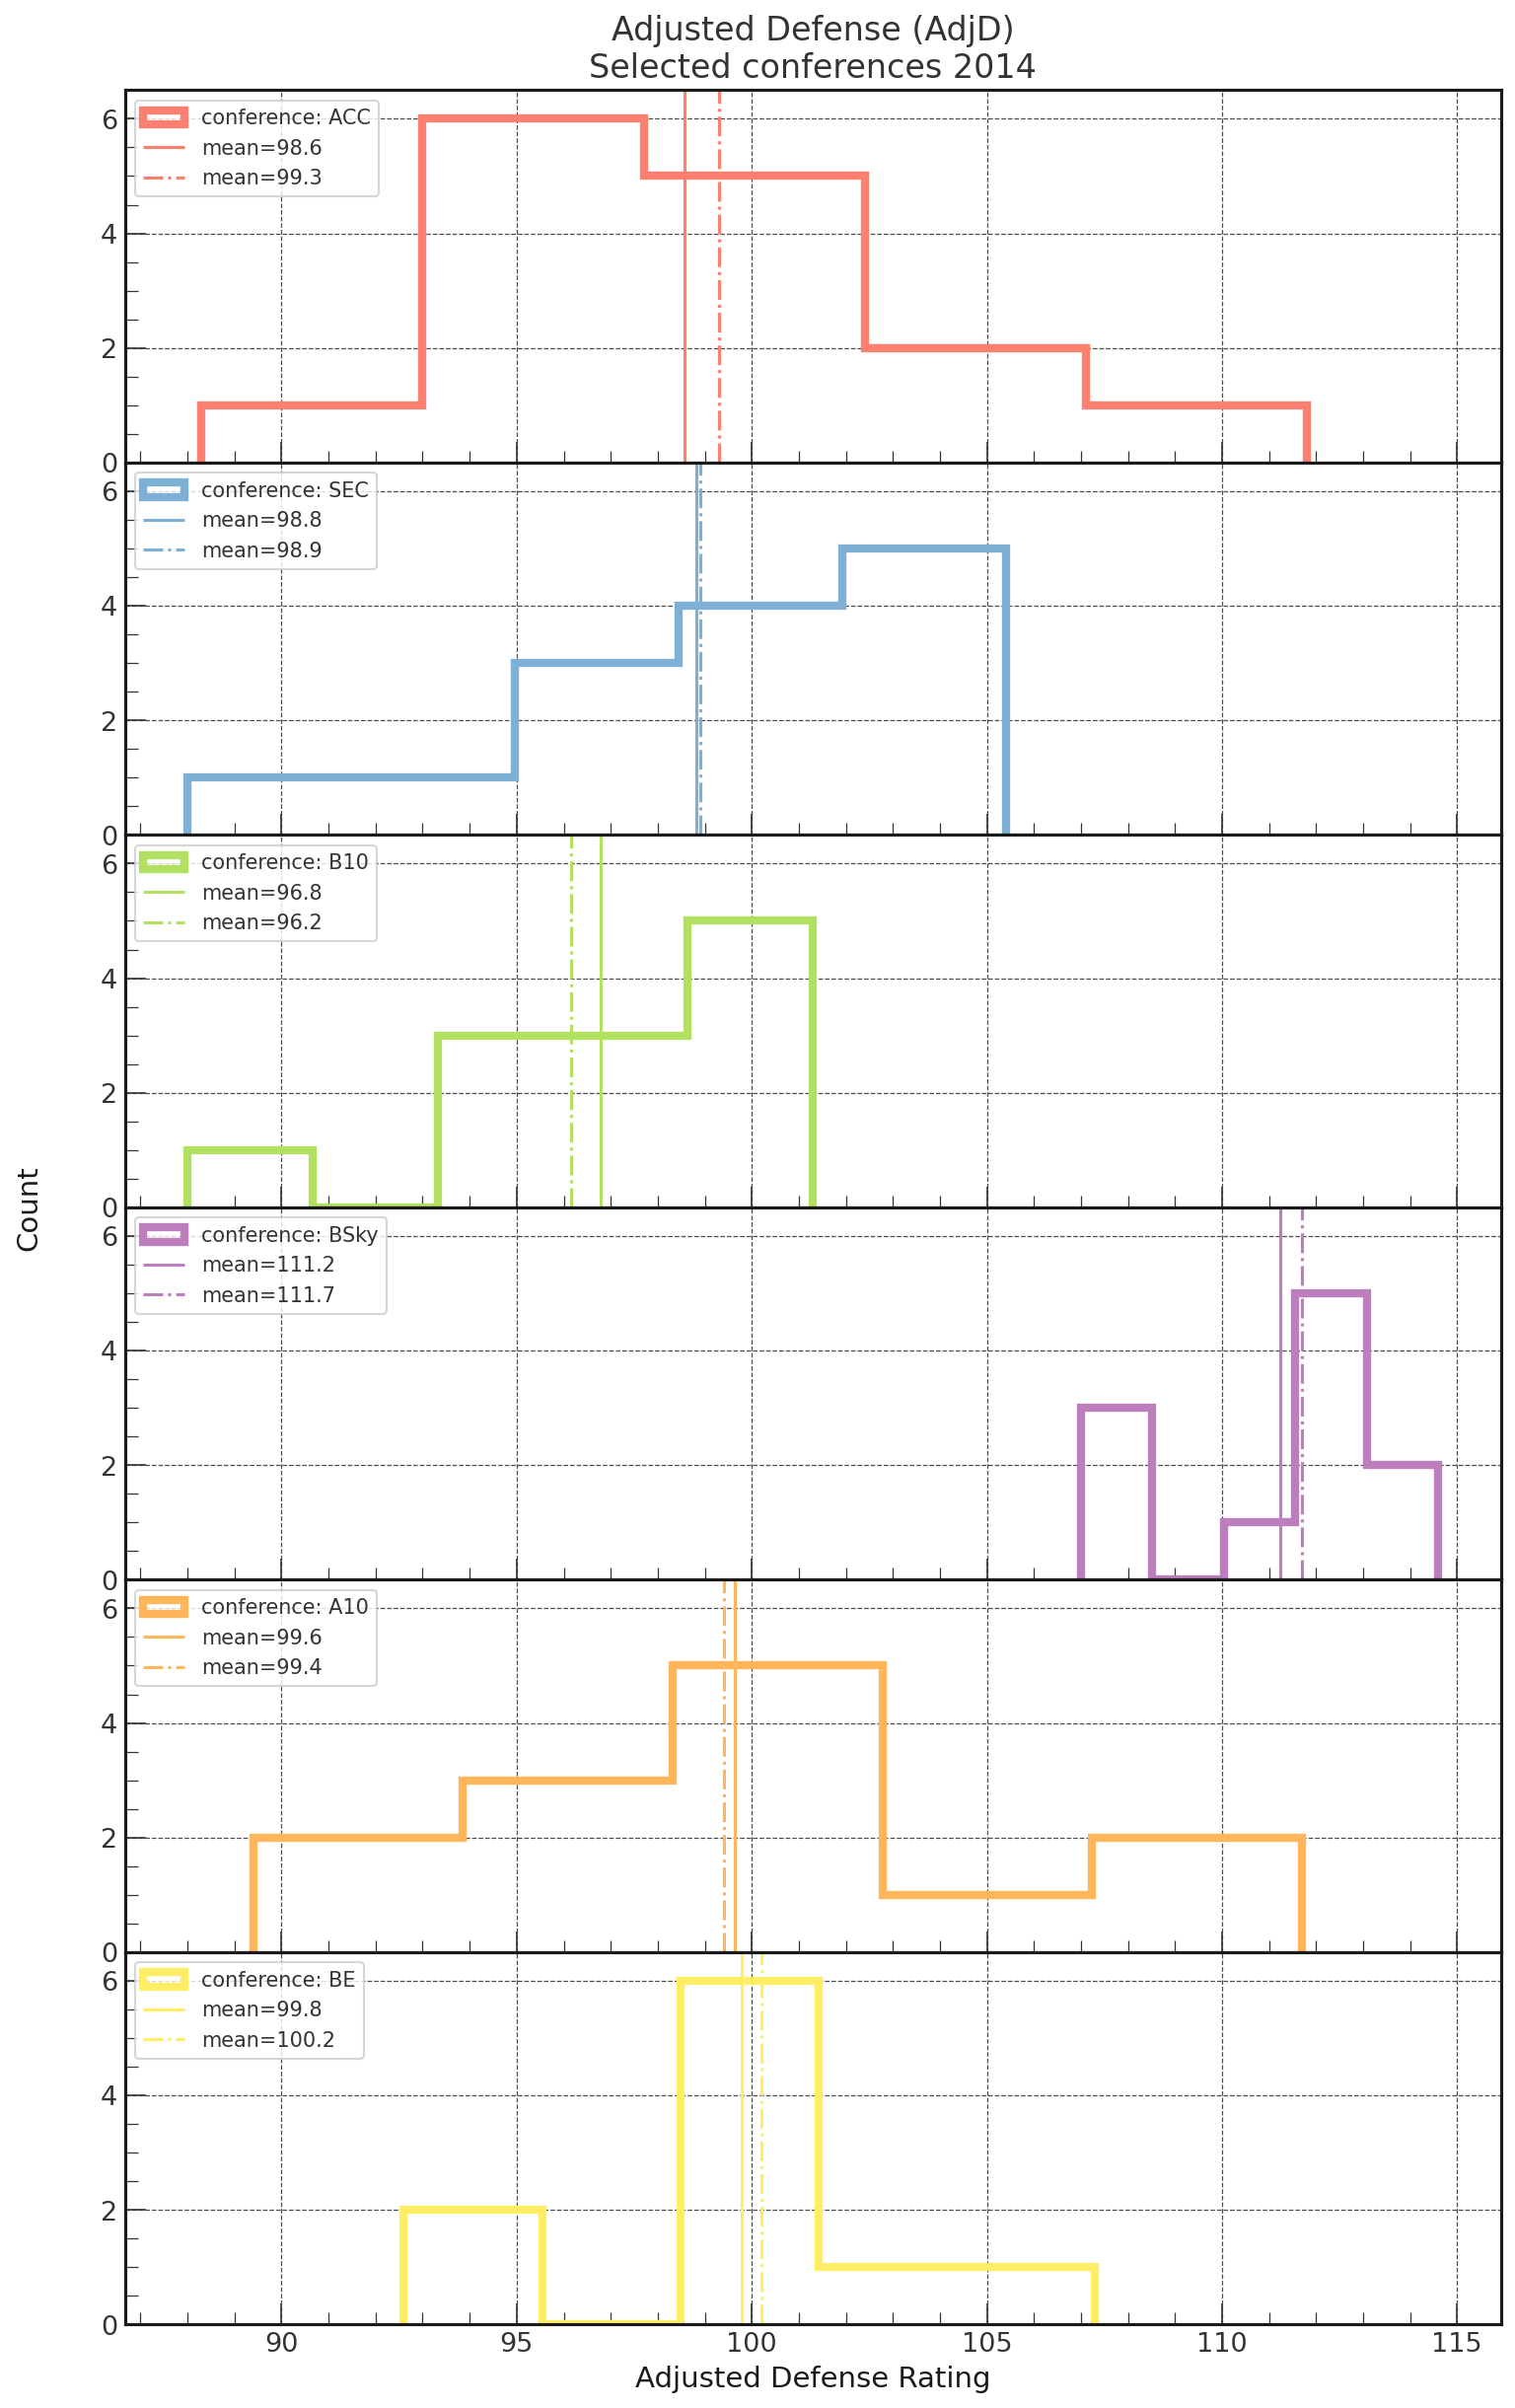

In [22]:
dict_conf_2014 = sort_as_dict(df_2014, 'Conf')
dict_conf_2009 = sort_as_dict(df_2009, 'Conf')

selected_conferences = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE']
prop_cycle = plt.rcParams['axes.prop_cycle']

xlabel = '$X$'
ylabel = '$Y$'


Nlayer = 6

fig, axarr = plt.subplots(Nlayer, figsize=(
    12, 20), sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0})

for i, (ax, key) in enumerate(zip(axarr, selected_conferences)):
    histos = df_2014['AdjD'][dict_conf_2014[key]]
    ax.hist(histos, bins=5, linewidth=4.0, color=prop_cycle.by_key()[
            'color'][i], label=f'conference: {selected_conferences[i]}', histtype='step')
    ax.set_ylim(ymin=0, ymax=6.5)
    ax.vlines(x=np.mean(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-', label=f'mean={np.mean(histos):.1f}')
    ax.vlines(x=np.median(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-.', label=f'mean={np.median(histos):.1f}')

    ax.legend(loc='upper left', prop={'size': 10})

ax.set(xlabel='Adjusted Defense Rating', ylabel='Count')
ax.yaxis.set_label_coords(-0.06, Nlayer/2)
axarr[0].set_title('Adjusted Defense (AdjD)\nSelected conferences 2014')

Text(0.5, 1.0, 'Adjusted Defense (AdjD)\nSelected conferences 2009')

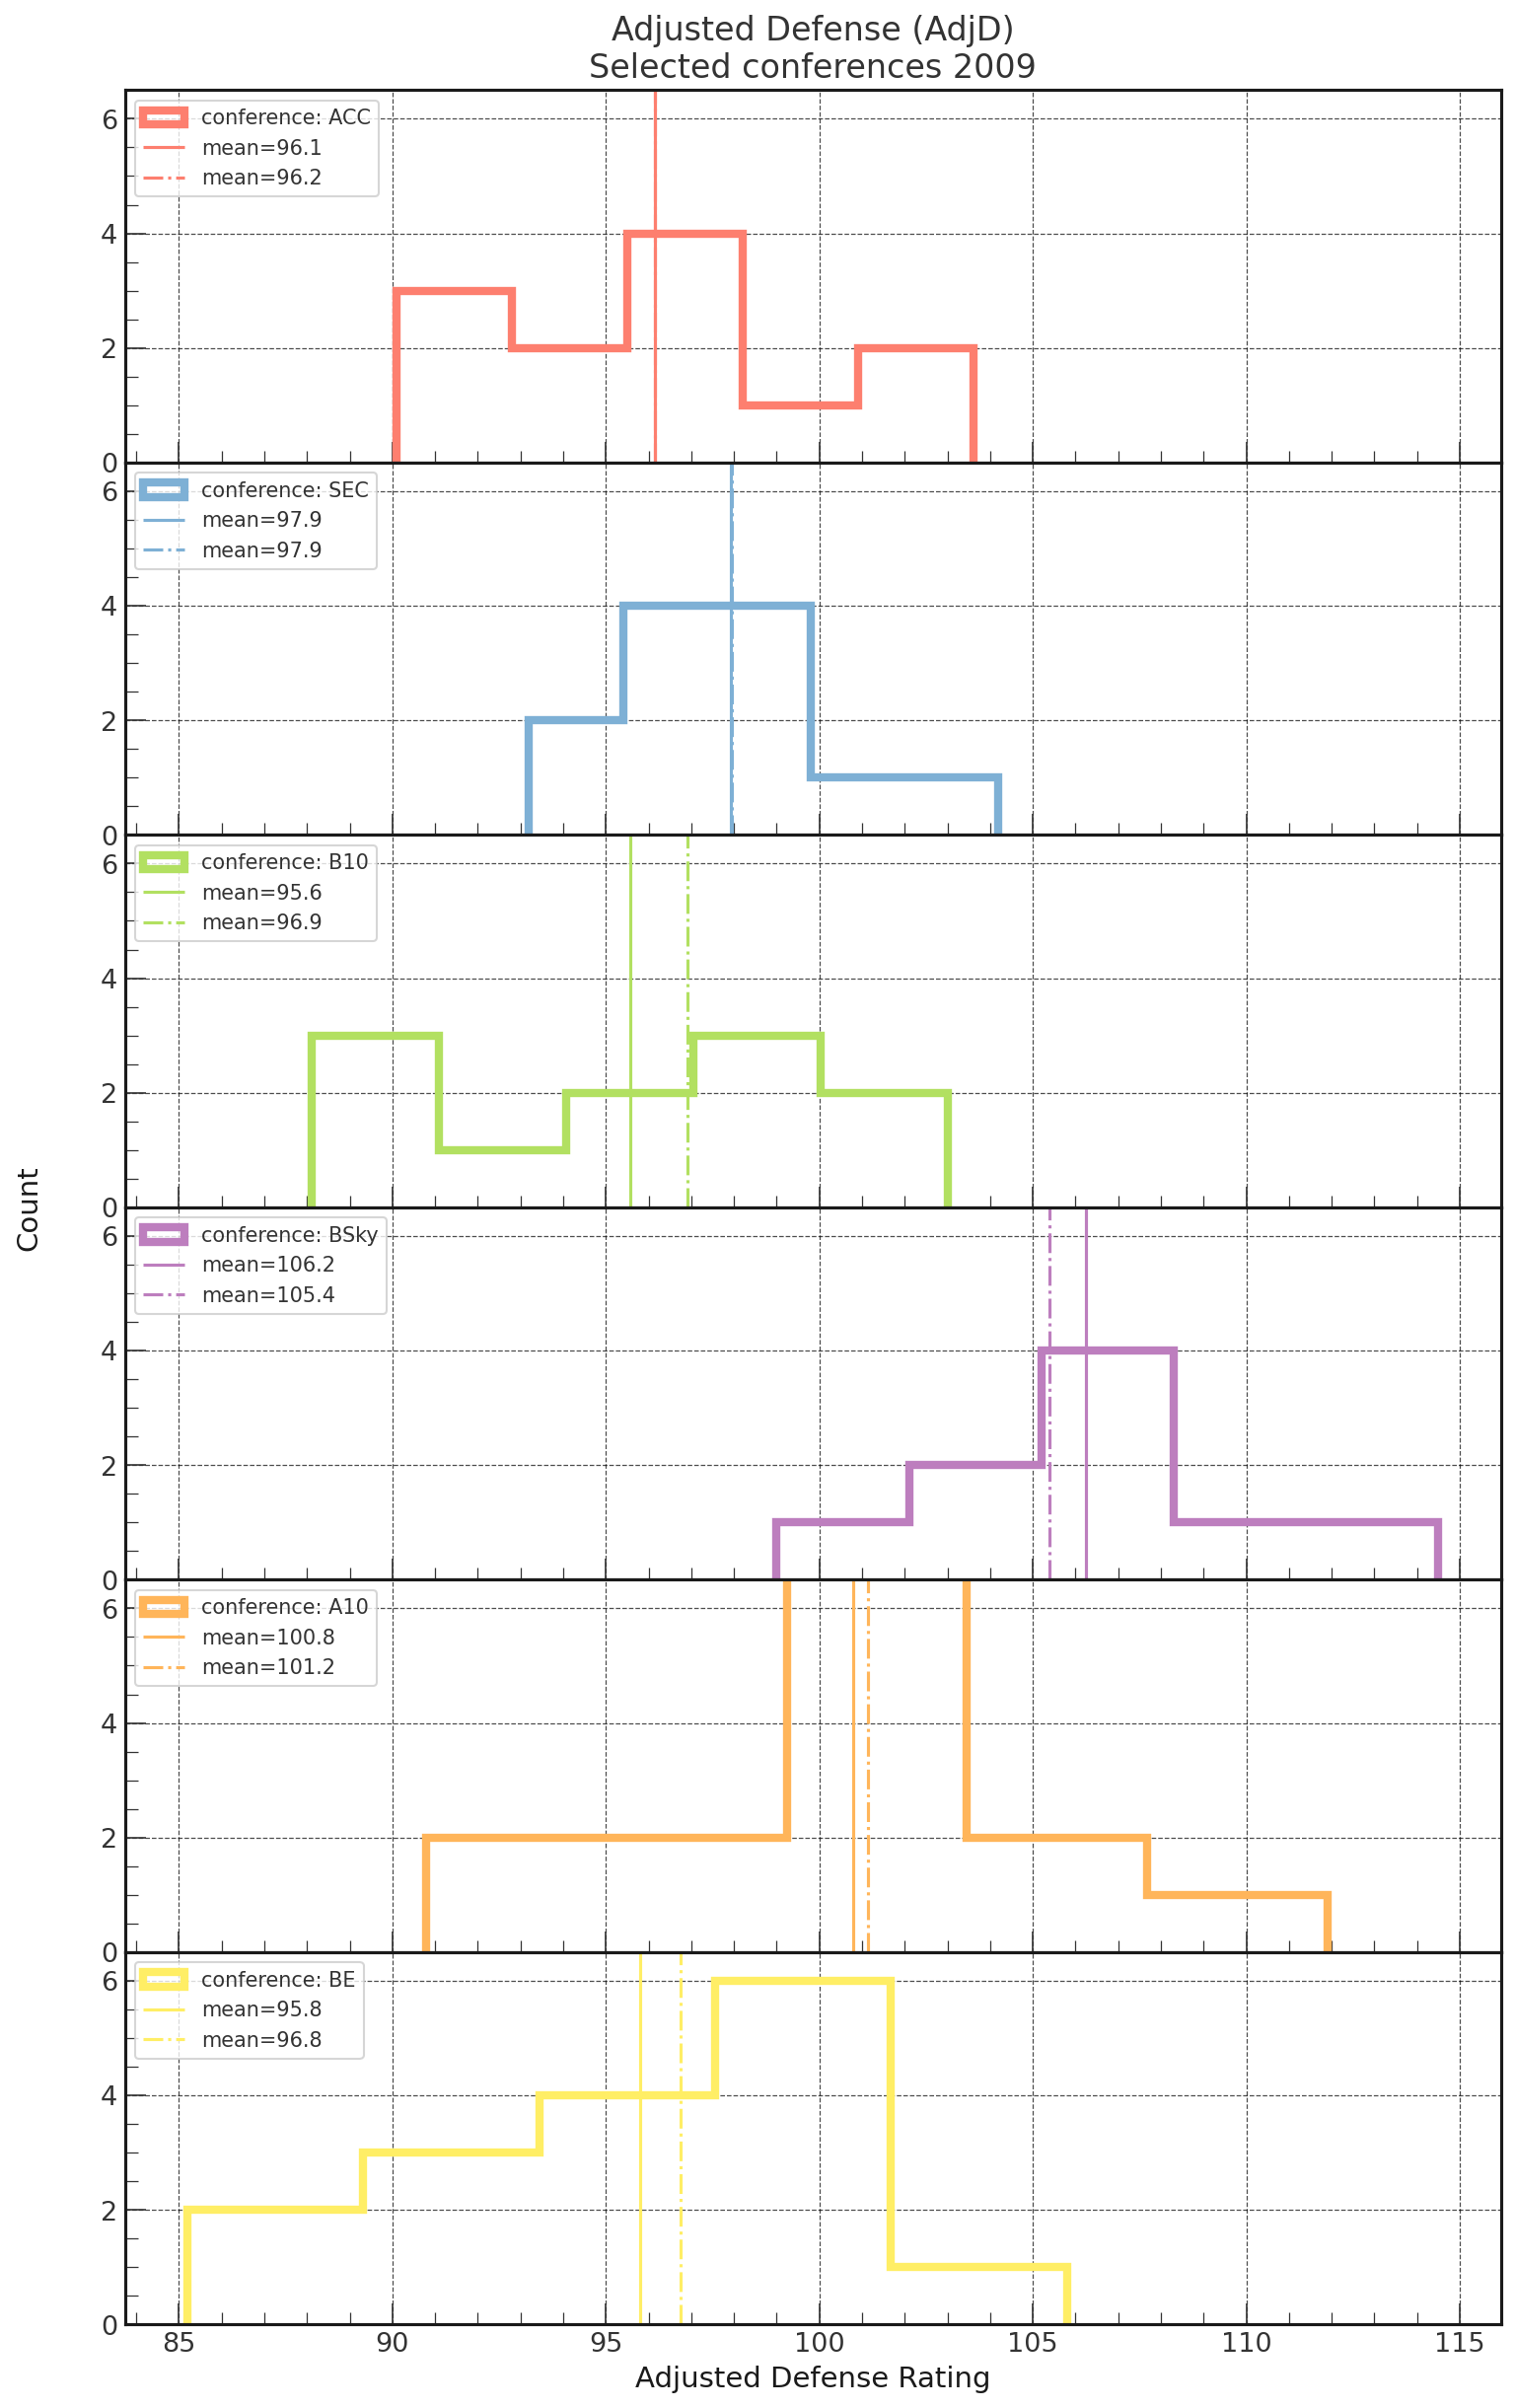

In [23]:
fig, axarr = plt.subplots(Nlayer, figsize=(
    12, 20), sharex='col', gridspec_kw={'hspace': 0, 'wspace': 0})

for i, (ax, key) in enumerate(zip(axarr, selected_conferences)):
    histos = df_2009['AdjD'][dict_conf_2009[key]]
    ax.hist(histos, bins=5, linewidth=4.0, color=prop_cycle.by_key()[
            'color'][i], label=f'conference: {selected_conferences[i]}', histtype='step')
    ax.set_ylim(ymin=0, ymax=6.5)
    ax.vlines(x=np.mean(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-', label=f'mean={np.mean(histos):.1f}')
    ax.vlines(x=np.median(histos), ymin=0, ymax=6.5, color=prop_cycle.by_key()[
              'color'][i], linestyles='-.', label=f'mean={np.median(histos):.1f}')

    ax.legend(loc='upper left', prop={'size': 10})

ax.set(xlabel='Adjusted Defense Rating', ylabel='Count')
ax.yaxis.set_label_coords(-0.06, Nlayer/2)
axarr[0].set_title('Adjusted Defense (AdjD)\nSelected conferences 2009')

In [24]:
dfmerge = df_2014.merge(df_2009, left_on=['Team', 'Conf'], right_on=[
                        'Team', 'Conf'], suffixes=('_2014', '_2009')).reset_index(drop=True)
dfmerge['AdjO_diff'] = dfmerge['AdjO_2014']-dfmerge['AdjO_2009']
bool_mask_merge = np.array(
    [conf in np.array(relevant_conferences) for conf in dfmerge["Conf"]])
df_merged_selected_conf = dfmerge.iloc[bool_mask_merge, :]
df_merged_rest = dfmerge.iloc[~bool_mask_merge, :]
conference_merged_selected_conf = sort_as_dict(df_merged_selected_conf, 'Conf')

AdjO_diff = np.abs(
    dfmerge['AdjO_diff'].iloc[bool_mask_merge].to_numpy(dtype=np.float64))

# plt.scatter(dfmerge['AdjO_2009'].iloc[bool_mask_merge],dfmerge['AdjO_2009'].iloc[bool_mask_merge]-dfmerge['AdjO_2014'].iloc[bool_mask_merge])

In [25]:
mean_rest = np.mean(df_merged_rest['AdjO_diff'])
median_rest = np.median(df_merged_rest['AdjO_diff'])

In [26]:
conf_mean = {}
conf_median = {}

for i, key in enumerate(df_merged_selected_conf['Conf']):
    if not key in conf_mean:
        conf_mean[key] = []
        conf_median[key] = []

    if key in conf_mean:
        conf_mean[key].append(df_merged_selected_conf['AdjO_diff'].iloc[i])
        conf_median[key].append(df_merged_selected_conf['AdjO_diff'].iloc[i])

for k, v in conf_mean.items():
    conf_mean[k] = np.mean(v)
for k, v in conf_median.items():
    conf_median[k] = np.median(v)
conf_mean = dict(list((i, conf_mean.get(i)) for i in selected_conferences))
conf_median = dict(list((i, conf_median.get(i)) for i in selected_conferences))

In [27]:
df_mean_median = pd.DataFrame(
    (conf_mean, conf_median), index=['Mean', 'Median'])
df_mean_median['Remaining'] = [mean_rest, median_rest]
df_mean_median = df_mean_median.round(2)
df_mean_median.to_latex(
    r'C:\Users\caspe\OneDrive\Desktop\AMAS2023\AMAS_casper\Assignment 1\Plots\mean_median_table_with_BE')


In [28]:
display(df_merged_selected_conf)

,Rk_2014,Team,Conf,W-L_2014,AdjO_2014,AdjD_2014,AdjT_2014,Luck_2014,AdjEM_2014,OppO_2014,...,Rk_2009,W-L_2009,AdjO_2009,AdjD_2009,AdjT_2009,Luck_2009,AdjEM_2009,OppO_2009,OppD_2009,AdjO_diff
0,3,Florida,SEC,36-3,116.5,88.0,61.3,0.053,2.39,109.4,...,35,25-11,115.1,98.9,65.8,-0.076,-8.15,104.0,101.4,1.4
1,4,Virginia,ACC,30-7,114.8,88.3,59.5,0.012,1.57,109.4,...,104,10-18,103.5,97.8,67.2,-0.066,-2.58,108.4,98.6,11.3
2,5,Wisconsin,B10,30-8,122.0,96.1,62.4,0.019,3.33,110.2,...,29,20-13,113.3,95.7,59.1,-0.052,1.32,107.3,97.8,8.7
5,8,Duke,ACC,26-9,124.7,100.4,64.6,-0.035,2.40,109.2,...,10,30-7,117.5,93.2,66.3,0.053,3.18,108.5,98.3,7.2
6,9,Michigan St.,B10,29-9,118.6,94.7,64.4,-0.003,0.57,110.2,...,9,31-7,114.3,89.9,66.5,0.091,5.81,109.4,97.1,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,260,Idaho St.,BSky,11-18,104.0,111.6,63.0,-0.091,6.90,103.5,...,193,13-19,102.7,105.4,62.6,-0.027,11.13,104.7,103.2,1.3
193,262,Northern Arizona,BSky,15-17,100.4,108.1,62.3,0.003,2.57,103.9,...,239,8-19,101.8,108.3,62.2,-0.132,9.85,104.3,104.0,-1.4
204,276,Sacramento St.,BSky,14-16,103.4,112.8,62.8,-0.008,1.19,102.6,...,339,2-27,89.6,114.5,63.6,0.017,0.09,103.1,104.8,13.8
205,278,Portland St.,BSky,17-15,102.3,111.7,64.9,0.063,-6.33,102.8,...,118,23-10,109.2,105.1,64.8,0.025,-0.00,101.5,104.8,-6.9


C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1618242387.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\caspe\AppData\Local\Temp/ipykernel_57324/1618242387.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'r', lw=2, label='Gauss PDF', color='#7eb0d5')


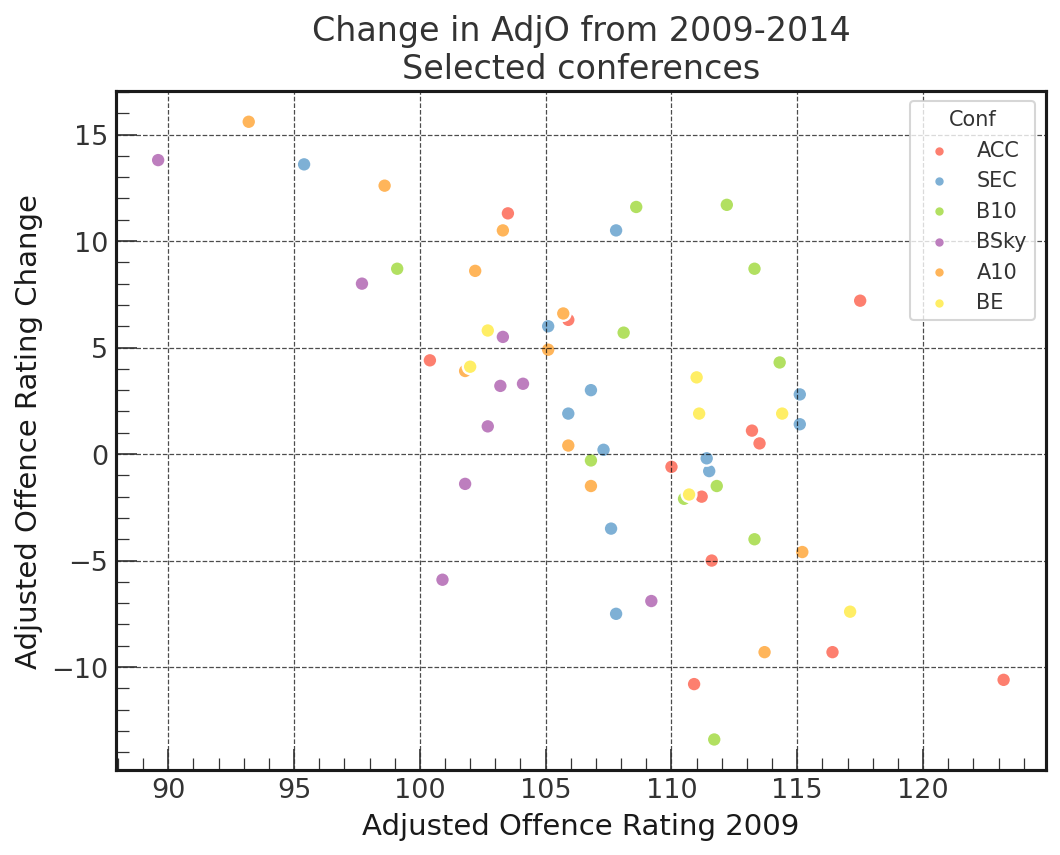

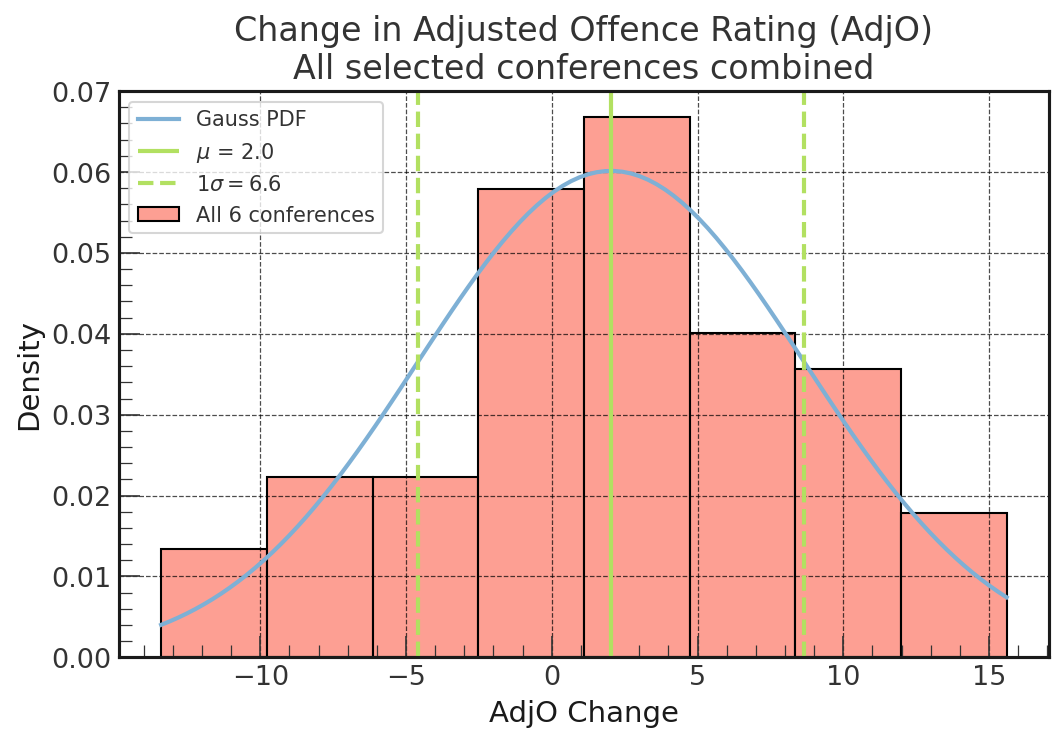

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df_merged_selected_conf, x='AdjO_2009', y='AdjO_diff',
                hue='Conf', hue_order=relevant_conferences, ax=ax, s=200)
ax.set_title('Change in AdjO from 2009-2014\nSelected conferences')
ax.set_xlabel('Adjusted Offence Rating 2009')
ax.set_ylabel('Adjusted Offence Rating Change')
fig.show()
fig, ax = plt.subplots(figsize=(8,5))
xmin, xmax = np.min(df_merged_selected_conf['AdjO_diff']), np.max(df_merged_selected_conf['AdjO_diff'])
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(df_merged_selected_conf['AdjO_diff'])
p = norm.pdf(x, mu, std)
sns.histplot(data=df_merged_selected_conf, x='AdjO_diff', color='#fd7f6f', ax=ax, kde=False, stat='density', label='All 6 conferences')
ax.plot(x, p, 'r', lw=2, label='Gauss PDF', color='#7eb0d5')  
ax.set_xlabel('AdjO Change')  
ax.set_title('Change in Adjusted Offence Rating (AdjO)\nAll selected conferences combined')       
ax.vlines(mu, ymin=0, ymax=0.07, color='#b2e061',linewidth=2, label=f'$\mu$ = {mu:.1f}')
ax.vlines(mu+std, ymin=0, ymax=0.07, linestyle='--', label=f'$1\sigma = {std:.1f}$', color='#b2e061',linewidth=2)
ax.vlines(mu-std, ymin=0, ymax=0.07, linestyle='--', color='#b2e061',linewidth=2)

ax.set_ymargin(0)                                        
ax.legend(loc='upper left')

In [47]:
import PyPDF2
import re
import numpy as np
import random
import pandas as pd
# creating a pdf file object
pdfFileObj = open('authors-acknowledgements-v5.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfReader(pdfFileObj)
  
# printing number of pages in pdf file
print(len(pdfReader.pages))
text = ''
for i in range(11):
	pageObj = pdfReader.pages[i]
	text += pageObj.extract_text()
pdfFileObj.close()

37


In [48]:
text = text.split('1LIGO',1)[0]
text = text.replace('\n', '')

text = ''.join([i for i in text if not i.isdigit()])
text = text.replace(',,',',')
text = text.replace(', ,',',')

text = re.sub("\(.*?\)","()",text)


text = text.replace('´', '')
text = text.replace('¨', '')
text = text.replace('(', ',')
text = text.replace(')', '')
text = text.replace('˜', '')
text = text.replace('ˇ', '')
text = text.replace('*', '')
text = text.replace(r'\x03', '')
text = text.replace('JR.','JR')

text = text.replace('MMA — LIGO-P- V','')
text = text.replace(',AND ', ',')
text = text.replace('DRAFT VERSION OCTOBER , Typeset using L ATEXtwocolumn style in AASTeXAUTHORS AND ACKNOWLEDGEMENTS FORMULTI-MESSENGER OBSERV ATIONS OF A BINARY NEUTRON STAR MERGER', '')
text = text.replace(' ','')
author_list = text.split(",")
while("" in author_list):
    author_list.remove("")
author_list[author_list.index('\x03G.GEMME')] = 'G.GEMME'
author_list[author_list.index('\x03T.D.GRUBB')] = 'T.D.GRUBB'


In [49]:
print(f'Total number of authors: {len(author_list)}\nNumber of unique authors: {len(set(author_list))}\nNumber of duplicate names: {len(author_list)-len(set(author_list))}')
author_list_sorted = sorted(author_list)
mid = len(author_list_sorted) // 2
res = (author_list_sorted[mid], author_list_sorted[~mid])
 
# Printing result
print("Median of list is : " + str(res))

Total number of authors: 3612
Number of unique authors: 3516
Number of duplicate names: 96
Median of list is : ('K.H.LAI', 'K.H.KAMPERT')


In [50]:
first_names = [name.rsplit('.', 1)[0] for name in author_list]
last_names = [name.rsplit('.', 1)[-1] for name in author_list]


df_authors = pd.DataFrame()
df_authors['First'] = first_names
df_authors['Last'] = last_names

df_authors = df_authors.sort_values(['Last', 'First']).reset_index()
df_authors.to_latex(r'C:\Users\caspe\OneDrive\Desktop\AMAS2023\AMAS_casper\Assignment 1\Plots\author_table')
display(df_authors)

,index,First,Last
0,3132,A,AAB
1,1152,M.G,AARTSEN
2,0,B.P,ABBOTT
3,1,R,ABBOTT
4,2,T.D,ABBOTT
...,...,...,...
3607,1103,M.E,ZUCKER
3608,1720,J,ZUNIGA
3609,1104,ANDJ,ZWEIZIG
3610,3560,A.F,˙ZARNECKI


In [51]:
mid = len(df_authors) // 2
res = (df_authors['First'][mid]+'.'+df_authors['Last'][mid], list(df_authors['First'])[~mid]+'.'+list(df_authors['Last'])[~mid])
 
# Printing result
print("Median of list is : " + str(res))

Median of list is : ('G.LI', 'C.K.LI')
